<a href="https://colab.research.google.com/github/cesong2/Display-Sensor/blob/Chan/comp%EC%8B%9C%EA%B0%81%ED%99%94%20%EC%9E%90%EB%A3%8C%ED%8F%AC%ED%95%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 


Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-san

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np

In [3]:
from datetime import timedelta
import datetime
import numpy as np
from datetime import datetime
import time

In [4]:
#Load the data
#telemetry_df = pd.read_csv("/content/PdM_telemetry.csv")
errors_df = pd.read_csv("/content/PdM_errors.csv")
maint_df = pd.read_csv("/content/PdM_maint.csv")
failures_df = pd.read_csv("/content/PdM_failures.csv")
machines_df = pd.read_csv("/content/PdM_machines.csv")
machines_age = pd.DataFrame(machines_df[['machineID','age']]).set_index('machineID')
machines_errors = pd.DataFrame(errors_df.groupby('machineID')['errorID'].count())
machines_maint = pd.DataFrame(maint_df.groupby('machineID')['comp'].count())
machines_failures = pd.DataFrame(failures_df.groupby('machineID')['failure'].count())

#전체 데이터 다시구하기

In [5]:
maint_df.head(3)

,datetime,machineID,comp
0,2014-06-01 06:00:00,1,comp2
1,2014-07-16 06:00:00,1,comp4
2,2014-07-31 06:00:00,1,comp3


In [6]:
tot_data = maint_df[maint_df['comp']== 'comp1'] #failures_maint별 정리
tot_data1 = maint_df[maint_df['comp']== 'comp2']
tot_data2 = maint_df[maint_df['comp']== 'comp3']
tot_data3 = maint_df[maint_df['comp']== 'comp4']
tot_dataset = tot_data.set_index('datetime').reset_index()#숫자 재정렬
tot_dataset1 = tot_data1.set_index('datetime').reset_index()
tot_dataset2 = tot_data2.set_index('datetime').reset_index()
tot_dataset3 = tot_data3.set_index('datetime').reset_index()

In [7]:
tot_dataset

,datetime,machineID,comp
0,2014-12-13 06:00:00,1,comp1
1,2015-01-05 06:00:00,1,comp1
2,2015-01-20 06:00:00,1,comp1
3,2015-03-06 06:00:00,1,comp1
4,2015-03-21 06:00:00,1,comp1
...,...,...,...
799,2015-04-28 06:00:00,100,comp1
800,2015-07-27 06:00:00,100,comp1
801,2015-09-10 06:00:00,100,comp1
802,2015-09-25 06:00:00,100,comp1


#총 몇번 교체되었는지 component별 확인

In [8]:
#maint 데이터파일 0과 1로 정리해주기
import numpy as np
comp_rep = pd.get_dummies(maint_df.set_index('datetime')).reset_index()
comp_rep.columns = ['datetime', 'machineID','comp1', 'comp2', 'comp3', 'comp4']
comp_rep = maint_df[['datetime', 'machineID']].merge(comp_rep,on=['datetime','machineID'],how='outer').fillna(0).sort_values(by=['machineID', 'datetime'])

In [9]:
comp_rep

,datetime,machineID,comp1,comp2,comp3,comp4
0,2014-06-01 06:00:00,1,0,1,0,0
1,2014-07-16 06:00:00,1,0,0,0,1
2,2014-07-31 06:00:00,1,0,0,1,0
3,2014-12-13 06:00:00,1,1,0,0,0
4,2015-01-05 06:00:00,1,0,0,0,1
...,...,...,...,...,...,...
4801,2015-10-10 06:00:00,100,0,0,1,0
4802,2015-10-25 06:00:00,100,0,0,0,1
4803,2015-11-09 06:00:00,100,0,0,0,1
4804,2015-12-09 06:00:00,100,0,1,0,0


In [10]:
#maint 데이터파일 시간대별로 채우기
components = ['comp1', 'comp2', 'comp3', 'comp4']
for comp in components:
    comp_rep.loc[comp_rep[comp] < 1, comp] = None
    comp_rep.loc[-comp_rep[comp].isnull(),
                 comp] = comp_rep.loc[-comp_rep[comp].isnull(), 'datetime']
    comp_rep[comp] = comp_rep[comp].fillna(method='ffill')

In [11]:
#컴포넌트별 모든 시간대 정리
comp1_t = pd.DataFrame(comp_rep, columns = ['datetime','machineID','comp1'])
comp2_t = pd.DataFrame(comp_rep, columns = ['datetime','machineID','comp2'])
comp3_t = pd.DataFrame(comp_rep, columns = ['datetime','machineID','comp3'])
comp4_t = pd.DataFrame(comp_rep, columns = ['datetime','machineID','comp4'])

In [12]:
#컴포넌트 시간대별 중복 데이터 정리
comp1_rep = comp1_t.drop_duplicates(['comp1']) #303데이터열
comp2_rep = comp2_t.drop_duplicates(['comp2']) #317데이터열
comp3_rep = comp3_t.drop_duplicates(['comp3']) #311데이터열
comp4_rep = comp4_t.drop_duplicates(['comp4']) #314데이터열

In [13]:
print(f'comp1은 {len(comp1_rep)}번 교체, comp2은 {len(comp2_rep)}번 교체, comp3은 {len(comp3_rep)}번 교체, comp4은 {len(comp4_rep)}번 교체,')

comp1은 303번 교체, comp2은 317번 교체, comp3은 311번 교체, comp4은 314번 교체,


In [14]:
comp1_t.head(30)

,datetime,machineID,comp1
0,2014-06-01 06:00:00,1,NaN
1,2014-07-16 06:00:00,1,NaN
2,2014-07-31 06:00:00,1,NaN
3,2014-12-13 06:00:00,1,2014-12-13 06:00:00
4,2015-01-05 06:00:00,1,2014-12-13 06:00:00
5,2015-01-05 06:00:00,1,2015-01-05 06:00:00
6,2015-01-05 06:00:00,1,2015-01-05 06:00:00
7,2015-01-05 06:00:00,1,2015-01-05 06:00:00
8,2015-01-20 06:00:00,1,2015-01-05 06:00:00
9,2015-01-20 06:00:00,1,2015-01-20 06:00:00


#고장에 의한 교체 찾기 $1 #다시 확인해보기.
--- 

In [15]:
#----------------------------------------------------------------------
df = pd.DataFrame(columns = {'failures_maint','machineID','datetime'})
df = df.reindex(columns = ['machineID','datetime','failures_maint'])
df

,machineID,datetime,failures_maint


In [16]:
#----------------------------------------------------------------------------
n = maint_df.merge(failures_df, on = ('machineID','datetime'),how = 'inner')
for i in range(len(n)):
  if n['comp'][i] == n['failure'][i]: #겹치는애들
    df.loc[i] = [n['machineID'][i],n['datetime'][i],n['failure'][i]]
  else:#겹치지 않는애들 (제거 요망)
    pass

In [17]:
#------------------------------------------------
df1 = df.set_index('datetime').reset_index() #숫자 재정렬
df1

,datetime,machineID,failures_maint
0,2015-01-05 06:00:00,1,comp4
1,2015-03-06 06:00:00,1,comp1
2,2015-04-20 06:00:00,1,comp2
3,2015-06-19 06:00:00,1,comp4
4,2015-09-02 06:00:00,1,comp4
...,...,...,...
738,2015-11-29 06:00:00,99,comp3
739,2015-12-14 06:00:00,99,comp4
740,2015-02-12 06:00:00,100,comp1
741,2015-09-10 06:00:00,100,comp1


In [18]:
#-------------------------------------
df_comp1 = df1[df1['failures_maint']== 'comp1'] #failures_maint별 정리
df_comp2 = df1[df1['failures_maint']== 'comp2']
df_comp3 = df1[df1['failures_maint']== 'comp3']
df_comp4 = df1[df1['failures_maint']== 'comp4']
df_com1 = df_comp1.set_index('datetime').reset_index()#숫자 재정렬
df_com2 = df_comp2.set_index('datetime').reset_index()
df_com3 = df_comp3.set_index('datetime').reset_index()
df_com4 = df_comp4.set_index('datetime').reset_index()

In [19]:
comp1 = tot_dataset.set_index('datetime').reset_index()
comp2 = tot_dataset1.set_index('datetime').reset_index()
comp3 = tot_dataset2.set_index('datetime').reset_index()
comp4 = tot_dataset3.set_index('datetime').reset_index()

In [20]:
#결측치 제거 전 (Nan값제거)
comp1
comp2
comp3
comp4
#결측치 제거 후 (Nan값제거)
comp1_n = comp1.dropna(axis=0) #결측치 1개 삭제
comp2_n = comp2.dropna(axis=0) #결측치 0개 삭제
comp3_n = comp3.dropna(axis=0) #결측치 1개 삭제
comp4_n = comp4.dropna(axis=0) #결측치 1개 삭제
#순서 재배치
comp1_n = comp1_n.set_index('datetime').reset_index()
comp2_n = comp2_n.set_index('datetime').reset_index()
comp3_n = comp3_n.set_index('datetime').reset_index()
comp4_n = comp4_n.set_index('datetime').reset_index()

In [21]:
#전체 교체주기 - 고장 교체주기 = 일반 교체주기
list_test_positive = [] #고장 안난데이터
list_id_positive = []
list_test_negative = []
list_id_negative = []
for i in range(len(comp1_n)):
  if comp1_n['datetime'][i] not in list(df_com1['datetime']): #겹치는애들 = 고장난애들
    list_test_negative.append(comp1_n['datetime'][i])
    list_id_negative.append(comp1_n['machineID'][i])
  else:
    #겹치지 않는애들 = 고장안난애들
    list_test_positive.append(comp1_n['datetime'][i])
    list_id_positive.append(comp1_n['machineID'][i])

list_test_positive2 = [] #고장 안난데이터
list_id_positive2 = []
list_test_negative2 = []
list_id_negative2 = []
for i in range(len(comp2_n)):
  if comp2_n['datetime'][i] not in list(df_com2['datetime']): #겹치는애들 = 고장난애들
    list_test_negative2.append(comp2_n['datetime'][i])
    list_id_negative2.append(comp2_n['machineID'][i])
  else:
    #겹치지 않는애들 = 고장안난애들
    list_test_positive2.append(comp2_n['datetime'][i])
    list_id_positive2.append(comp2_n['machineID'][i])

list_test_positive3 = [] #고장 안난데이터
list_id_positive3 = []
list_test_negative3 = []
list_id_negative3 = []

for i in range(len(comp3_n)):
  if comp3_n['datetime'][i] not in list(df_com3['datetime']): #겹치는애들 = 고장난애들
    list_test_negative3.append(comp3_n['datetime'][i])
    list_id_negative3.append(comp3_n['machineID'][i])
  else:
    #겹치지 않는애들 = 고장안난애들
    list_test_positive3.append(comp3_n['datetime'][i])
    list_id_positive3.append(comp3_n['machineID'][i])


list_test_positive4 = [] #고장 안난데이터
list_id_positive4 = []
list_test_negative4 = []
list_id_negative4 = []
for i in range(len(comp4_n)):
  if comp4_n['datetime'][i] not in list(df_com4['datetime']): #겹치는애들 = 고장난애들
    list_test_negative4.append(comp4_n['datetime'][i])
    list_id_negative4.append(comp4_n['machineID'][i])
  else:
    #겹치지 않는애들 = 고장안난애들
    list_test_positive4.append(comp4_n['datetime'][i])
    list_id_positive4.append(comp4_n['machineID'][i])

In [22]:
neg_t= pd.DataFrame(data=list(zip(list_test_negative,list_id_negative)),columns = ['datetime','machineID'])
neg_t1= pd.DataFrame(data=list(zip(list_test_negative2,list_id_negative2)),columns = ['datetime','machineID'])
neg_t2= pd.DataFrame(data=list(zip(list_test_negative3,list_id_negative3)),columns = ['datetime','machineID'])
neg_t3= pd.DataFrame(data=list(zip(list_test_negative4,list_id_negative4)),columns = ['datetime','machineID'])
neg_t['comp1'] = 'comp1'
neg_t1['comp2'] = 'comp2'
neg_t2['comp3'] = 'comp3'
neg_t3['comp4'] = 'comp4'

In [23]:
len(neg_t),len(neg_t1),len(neg_t2),len(neg_t3)

(381, 345, 514, 379)

In [24]:
#datetime 을 이용한 교체주기 확인
fail_com = []
n = 1
for i in range(len(neg_t)-1):
  if n != range(len(neg_t)):
    str_datetime1 = neg_t["datetime"][n]
    str_datetime2 = neg_t["datetime"][i]
    currdate1 = datetime.strptime(str_datetime1, '%Y-%m-%d %H:%M:%S')
    currdate2 = datetime.strptime(str_datetime2, '%Y-%m-%d %H:%M:%S')
    new = currdate1- currdate2
    fail_com.append(new.days)
    n += 1
  else:
    break
fail_com1 = []
n1 = 1
for i in range(len(neg_t1)-1):
  if n1 != range(len(neg_t1)):
    str_datetime1 = neg_t1["datetime"][n1]
    str_datetime2 = neg_t1["datetime"][i]
    currdate1 = datetime.strptime(str_datetime1, '%Y-%m-%d %H:%M:%S')
    currdate2 = datetime.strptime(str_datetime2, '%Y-%m-%d %H:%M:%S')
    new = currdate1- currdate2
    fail_com1.append(new.days)
    n1 += 1
  else:
    break
fail_com2 = []
n2 = 1
for i in range(len(neg_t2)-1):
  if n2 != range(len(neg_t2)):
    str_datetime1 = neg_t2["datetime"][n2]
    str_datetime2 = neg_t2["datetime"][i]
    currdate1 = datetime.strptime(str_datetime1, '%Y-%m-%d %H:%M:%S')
    currdate2 = datetime.strptime(str_datetime2, '%Y-%m-%d %H:%M:%S')
    new = currdate1- currdate2
    fail_com2.append(new.days)
    n2 += 1
  else:
    break
fail_com3 = []
n3 = 1
for i in range(len(neg_t3)-1):
  if n3 != range(len(neg_t3)):
    str_datetime1 = neg_t3["datetime"][n3]
    str_datetime2 = neg_t3["datetime"][i]
    currdate1 = datetime.strptime(str_datetime1, '%Y-%m-%d %H:%M:%S')
    currdate2 = datetime.strptime(str_datetime2, '%Y-%m-%d %H:%M:%S')
    new = currdate1- currdate2
    fail_com3.append(new.days)
    n3 += 1
  else:
    break

In [25]:
#리스트 안의 음수를 none으로 바꾸기 #def로 바꾸기
fail_comp =[]
for i in range(len(fail_com)):
  if fail_com[i] > 0:
    fail_comp.append(fail_com[i])
  else:
    fail_comp.append(None)
fail_comp1 =[]
for i in range(len(fail_com1)):
  if fail_com1[i] > 0:
    fail_comp1.append(fail_com1[i])
  else:
    fail_comp1.append(None)
fail_comp2 =[]
for i in range(len(fail_com2)):
  if fail_com2[i] > 0:
    fail_comp2.append(fail_com2[i])
  else:
    fail_comp2.append(None)
fail_comp3 =[]
for i in range(len(fail_com3)):
  if fail_com3[i] > 0:
    fail_comp3.append(fail_com3[i])
  else:
    fail_comp3.append(None)

In [26]:
#마지막 한 열은 다음 계산할것이 없으니 None값 하나를 추가해줘서 index개수 맞춰주기
fail_comp.append(None)
fail_comp1.append(None) 
fail_comp2.append(None) 
fail_comp3.append(None) 

In [27]:
#기존데이터에 dataframe으로 추가해주기
neg_t['time_diff'] = fail_comp
neg_t1['time_diff'] = fail_comp1
neg_t2['time_diff'] = fail_comp2
neg_t3['time_diff'] = fail_comp3

In [28]:
#def 로 바꾸기
li_co = []#한개씩가져오기
li1_co = []#최소 한개 이상인 데이터 머신아이디 뽑아오기
for i in range(len(neg_t)):
  if neg_t['machineID'][i] not in li_co:
    li_co.append(neg_t['machineID'][i])
  else:
    li1_co.append(neg_t['machineID'][i])
li_co1 = []#한개씩가져오기
li1_co1 = []#최소 한개 이상인 데이터 머신아이디 뽑아오기
for i in range(len(neg_t1)):
  if neg_t1['machineID'][i] not in li_co1:
    li_co1.append(neg_t1['machineID'][i])
  else:
    li1_co1.append(neg_t1['machineID'][i])
li_co2 = []#한개씩가져오기
li1_co2 = []#최소 한개 이상인 데이터 머신아이디 뽑아오기
for i in range(len(neg_t2)):
  if neg_t2['machineID'][i] not in li_co2:
    li_co2.append(neg_t2['machineID'][i])
  else:
    li1_co2.append(neg_t2['machineID'][i])
li_co3 = []#한개씩가져오기
li1_co3 = []#최소 한개 이상인 데이터 머신아이디 뽑아오기
for i in range(len(neg_t3)):
  if neg_t3['machineID'][i] not in li_co3:
    li_co3.append(neg_t3['machineID'][i])
  else:
    li1_co3.append(neg_t3['machineID'][i])
  

In [29]:
#중복처리
li1_co=set(li1_co)
li1_co1=set(li1_co1)
li1_co2=set(li1_co2)
li1_co3=set(li1_co3)

In [30]:
#한개씩 있는 머신아이디 추출
fail_c = []
for i in range(len(li_co)):
  if li_co[i] not in li1_co:
    fail_c.append(li_co[i])
  else:
    pass
fail_c1 = []
for i in range(len(li_co1)):
  if li_co1[i] not in li1_co1:
    fail_c1.append(li_co1[i])
  else:
    pass
fail_c2 = []
for i in range(len(li_co2)):
  if li_co2[i] not in li1_co2:
    fail_c2.append(li_co2[i])
  else:
    pass
fail_c3 = []
for i in range(len(li_co3)):
  if li_co3[i] not in li1_co3:
    fail_c3.append(li_co3[i])
  else:
    pass

In [31]:
#한개씩 있는 machineID의 time_diff를 nan값으로 처리
for i in range(len(fail_c)):
  df_com1.loc[df_com1['machineID']==fail_c[i],'time_diff'] = None
for i in range(len(fail_c1)):
  df_com2.loc[df_com2['machineID']==fail_c1[i],'time_diff'] = None
for i in range(len(fail_c2)):
  df_com3.loc[df_com3['machineID']==fail_c2[i],'time_diff'] = None
for i in range(len(fail_c3)):
  df_com4.loc[df_com4['machineID']==fail_c3[i],'time_diff'] = None

In [32]:
ans1 = neg_t['time_diff'].mean().round(2)
ans2 = neg_t1['time_diff'].mean().round(2)
ans3= neg_t2['time_diff'].mean().round(2)
ans4= neg_t3['time_diff'].mean().round(2)
print(f'고장난 컴포넌트 1의 평균 교체주기 (day)는 {ans1}일입니다,   컴포넌트 2의 평균 교체주기 (day)는 {ans2}일입니다,    컴포넌트 3의 평균 교체주기 (day)는 {ans3}일입니다,    컴포넌트 4의 평균 교체주기 (day)는 {ans4}일입니다')

고장난 컴포넌트 1의 평균 교체주기 (day)는 124.04일입니다,   컴포넌트 2의 평균 교체주기 (day)는 136.96일입니다,    컴포넌트 3의 평균 교체주기 (day)는 92.89일입니다,    컴포넌트 4의 평균 교체주기 (day)는 117.81일입니다


#고장+일반교체) 교체주기 확인 $3

---



In [33]:
#datetime 을 이용한 교체주기 확인
comp1_re = []
n = 1
for i in range(len(comp1_n)-1):
  if n != range(len(comp1_n)):
    str_datetime1 = comp1_n["datetime"][n]
    str_datetime2 = comp1_n["datetime"][i]
    currdate1 = datetime.strptime(str_datetime1, '%Y-%m-%d %H:%M:%S')
    currdate2 = datetime.strptime(str_datetime2, '%Y-%m-%d %H:%M:%S')
    new = currdate1- currdate2
    comp1_re.append(new.days)
    n += 1
  else:
    break
comp2_re = []
n1 = 1
for i in range(len(comp2_n)-1):
  if n1 != range(len(comp2_n)):
    str_datetime1 = comp2_n["datetime"][n1]
    str_datetime2 = comp2_n["datetime"][i]
    currdate1 = datetime.strptime(str_datetime1, '%Y-%m-%d %H:%M:%S')
    currdate2 = datetime.strptime(str_datetime2, '%Y-%m-%d %H:%M:%S')
    new = currdate1- currdate2
    comp2_re.append(new.days)
    n1 += 1
  else:
    break
comp3_re = []
n2 = 1
for i in range(len(comp3_n)-1):
  if n2 != range(len(comp3_n)):
    str_datetime1 = comp3_n["datetime"][n2]
    str_datetime2 = comp3_n["datetime"][i]
    currdate1 = datetime.strptime(str_datetime1, '%Y-%m-%d %H:%M:%S')
    currdate2 = datetime.strptime(str_datetime2, '%Y-%m-%d %H:%M:%S')
    new = currdate1- currdate2
    comp3_re.append(new.days)
    n2 += 1
  else:
    break
comp4_re = []
n3 = 1
for i in range(len(comp4_n)-1):
  if n3 != range(len(comp4_n)):
    str_datetime1 = comp4_n["datetime"][n3]
    str_datetime2 = comp4_n["datetime"][i]
    currdate1 = datetime.strptime(str_datetime1, '%Y-%m-%d %H:%M:%S')
    currdate2 = datetime.strptime(str_datetime2, '%Y-%m-%d %H:%M:%S')
    new = currdate1- currdate2
    comp4_re.append(new.days)
    n3 += 1
  else:
    break

In [34]:
# 음수인 데이터는 machineID 가 바뀌면서 생기는 데이터로 사실상 의미가없음.
len(comp1_re),len(comp2_re),len(comp3_re),len(comp4_re)

(803, 862, 807, 810)

In [35]:
#리스트 안의 음수를 none으로 바꾸기 #def로 바꾸기
comp1_re1 =[]
for i in range(len(comp1_re)):
  if comp1_re[i] > 0:
    comp1_re1.append(comp1_re[i])
  else:
    comp1_re1.append(None)
  
comp2_re1 =[]
for i in range(len(comp2_re)):
  if comp2_re[i] > 0:
    comp2_re1.append(comp2_re[i])
  else:
    comp2_re1.append(None)
  
comp3_re1 =[]
for i in range(len(comp3_re)):
  if comp3_re[i] > 0:
    comp3_re1.append(comp3_re[i])
  else:
    comp3_re1.append(None)
  
comp4_re1 =[]
for i in range(len(comp4_re)):
  if comp4_re[i] > 0:
    comp4_re1.append(comp4_re[i])
  else:
    comp4_re1.append(None)

In [36]:
#마지막 한 열은 다음 계산할것이 없으니 None값 하나를 추가해줘서 index개수 맞춰주기
comp1_re1.append(None) 
comp2_re1.append(None) 
comp3_re1.append(None) 
comp4_re1.append(None) 

In [37]:
#기존데이터에 dataframe으로 추가해주기
comp1_n['time_diff'] = comp1_re1
comp2_n['time_diff'] = comp2_re1
comp3_n['time_diff'] = comp3_re1
comp4_n['time_diff'] = comp4_re1

In [38]:
#def 로 바꾸기
li = []#한개씩가져오기
li1 = []#최소 한개 이상인 데이터 머신아이디 뽑아오기
for i in range(len(comp1_n)):
  if comp1_n['machineID'][i] not in li:
    li.append(comp1_n['machineID'][i])
  else:
    li1.append(comp1_n['machineID'][i])


li2 = []#한개씩가져오기
li3 = []#최소 한개 이상인 데이터 머신아이디 뽑아오기
for i in range(len(comp2_n)):
  if comp2_n['machineID'][i] not in li2:
    li2.append(comp2_n['machineID'][i])
  else:
    li3.append(comp2_n['machineID'][i])


li4 = []#한개씩가져오기
li5 = []#최소 한개 이상인 데이터 머신아이디 뽑아오기
for i in range(len(comp3_n)):
  if comp3_n['machineID'][i] not in li4:
    li4.append(comp3_n['machineID'][i])
  else:
    li5.append(comp3_n['machineID'][i])


li6 = []#한개씩가져오기
li7 = []#최소 한개 이상인 데이터 머신아이디 뽑아오기
for i in range(len(comp4_n)):
  if comp4_n['machineID'][i] not in li6:
    li6.append(comp4_n['machineID'][i])
  else:
    li7.append(comp4_n['machineID'][i])

In [39]:
#중복처리
li1=set(li1)
li3=set(li3)
li5=set(li5)
li7=set(li7)

In [40]:
#한개씩 있는 머신아이디 추출
nli1 = []
for i in range(len(li)):
  if li[i] not in li1:
    nli1.append(li[i])
  else:
    pass

nli2 = []
for i in range(len(li2)):
  if li2[i] not in li3:
    nli2.append(li2[i])
  else:
    pass

nli3 = []
for i in range(len(li4)):
  if li4[i] not in li5:
    nli3.append(li4[i])
  else:
    pass

nli4 = []
for i in range(len(li6)):
  if li6[i] not in li7:
    nli4.append(li6[i])
  else:
    pass

In [41]:
 #한개씩 있는 머신아이디 추출
nli1
nli2
nli3
nli4

[]

In [42]:
#nli를 이용하여 한개씩 있는 machineID의 time_diff를 nan값으로 처리
for i in range(len(nli1)):
  comp1_n.loc[comp1_n['machineID']==nli1[i],'time_diff'] = None
for i in range(len(nli2)):
  comp2_n.loc[comp2_n['machineID']==nli2[i],'time_diff'] = None
for i in range(len(nli3)):
  comp3_n.loc[comp3_n['machineID']==nli3[i],'time_diff'] = None
for i in range(len(nli4)):
  comp4_n.loc[comp4_n['machineID']==nli4[i],'time_diff'] = None

In [43]:
#데이터 개수 확인
len(comp1_n),len(comp2_n),len(comp3_n),len(comp4_n)

(804, 863, 808, 811)

In [44]:
#day기준
comp1_n['time_diff'].describe()
comp2_n['time_diff'].describe()
comp3_n['time_diff'].describe()
comp4_n['time_diff'].describe()
comp_mean1=comp1_n['time_diff'].mean().round(3)
comp_mean2=comp2_n['time_diff'].mean().round(3)
comp_mean3=comp3_n['time_diff'].mean().round(3)
comp_mean4=comp4_n['time_diff'].mean().round(3)
print(f'컴포넌트 1의 평균 교체주기 (day)는 {comp_mean1}일입니다,   컴포넌트 2의 평균 교체주기 (day)는 {comp_mean2}일입니다,    컴포넌트 3의 평균 교체주기 (day)는 {comp_mean3}일입니다,    컴포넌트 4의 평균 교체주기 (day)는 {comp_mean4}일입니다')

컴포넌트 1의 평균 교체주기 (day)는 61.122일입니다,   컴포넌트 2의 평균 교체주기 (day)는 57.241일입니다,    컴포넌트 3의 평균 교체주기 (day)는 62.006일입니다,    컴포넌트 4의 평균 교체주기 (day)는 61.639일입니다


#고장제외) 컴포넌트 교체 주기 $2

In [45]:
df_1 = pd.DataFrame(columns = {'failures_maint','machineID','datetime'})
df_1 = df_1.reindex(columns = ['machineID','datetime','failures_maint'])
df_1

,machineID,datetime,failures_maint


In [46]:
list_test_positive #고장 안난데이터
len(list_id_positive), len(list_test_negative)

(423, 381)

In [47]:
#전체 교체주기 - 고장 교체주기 = 일반 교체주기
list_test_positive = [] #고장 안난데이터
list_id_positive = []
for i in range(len(comp1_n)):
  if comp1_n['datetime'][i] not in list(df_com1['datetime']): #겹치는애들 = 고장난애들
    pass
  else:
    #겹치지 않는애들 = 고장안난애들
    list_test_positive.append(comp1_n['datetime'][i])
    list_id_positive.append(comp1_n['machineID'][i])

list_test_positive2 = [] #고장 안난데이터
list_id_positive2 = []

for i in range(len(comp2_n)):
  if comp2_n['datetime'][i] not in list(df_com2['datetime']): #겹치는애들 = 고장난애들
    pass
  else:
    #겹치지 않는애들 = 고장안난애들
    list_test_positive2.append(comp2_n['datetime'][i])
    list_id_positive2.append(comp2_n['machineID'][i])

list_test_positive3 = [] #고장 안난데이터
list_id_positive3 = []


for i in range(len(comp3_n)):
  if comp3_n['datetime'][i] not in list(df_com3['datetime']): #겹치는애들 = 고장난애들
    pass
  else:
    #겹치지 않는애들 = 고장안난애들
    list_test_positive3.append(comp3_n['datetime'][i])
    list_id_positive3.append(comp3_n['machineID'][i])


list_test_positive4 = [] #고장 안난데이터
list_id_positive4 = []
for i in range(len(comp4_n)):
  if comp4_n['datetime'][i] not in list(df_com4['datetime']): #겹치는애들 = 고장난애들
    pass
  else:
    #겹치지 않는애들 = 고장안난애들
    list_test_positive4.append(comp4_n['datetime'][i])
    list_id_positive4.append(comp4_n['machineID'][i])

In [48]:
df_test= pd.DataFrame(data=list(zip(list_test_positive,list_id_positive)),columns = ['datetime','machineID'])
df_test1= pd.DataFrame(data=list(zip(list_test_positive2,list_id_positive2)),columns = ['datetime','machineID'])
df_test2= pd.DataFrame(data=list(zip(list_test_positive3,list_id_positive3)),columns = ['datetime','machineID'])
df_test3= pd.DataFrame(data=list(zip(list_test_positive4,list_id_positive4)),columns = ['datetime','machineID'])
df_test['comp1'] = 'comp1'
df_test1['comp2'] = 'comp2'
df_test2['comp3'] = 'comp3'
df_test3['comp4'] = 'comp4'

In [49]:
#datetime 을 이용한 교체주기 확인
comp1_re = []
n = 1
for i in range(len(df_test)-1):
  if n != range(len(df_test)):
    str_datetime1 = df_test["datetime"][n]
    str_datetime2 = df_test["datetime"][i]
    currdate1 = datetime.strptime(str_datetime1, '%Y-%m-%d %H:%M:%S')
    currdate2 = datetime.strptime(str_datetime2, '%Y-%m-%d %H:%M:%S')
    new = currdate1- currdate2
    comp1_re.append(new.days)
    n += 1
  else:
    break
comp1_re1 = []
n = 1
for i in range(len(df_test1)-1):
  if n != range(len(df_test1)):
    str_datetime1 = df_test1["datetime"][n]
    str_datetime2 = df_test1["datetime"][i]
    currdate1 = datetime.strptime(str_datetime1, '%Y-%m-%d %H:%M:%S')
    currdate2 = datetime.strptime(str_datetime2, '%Y-%m-%d %H:%M:%S')
    new = currdate1- currdate2
    comp1_re1.append(new.days)
    n += 1
  else:
    break
comp1_re2 = []
n = 1
for i in range(len(df_test2)-1):
  if n != range(len(df_test2)):
    str_datetime1 = df_test2["datetime"][n]
    str_datetime2 = df_test2["datetime"][i]
    currdate1 = datetime.strptime(str_datetime1, '%Y-%m-%d %H:%M:%S')
    currdate2 = datetime.strptime(str_datetime2, '%Y-%m-%d %H:%M:%S')
    new = currdate1- currdate2
    comp1_re2.append(new.days)
    n += 1
  else:
    break
comp1_re3 = []
n = 1
for i in range(len(df_test3)-1):
  if n != range(len(df_test3)):
    str_datetime1 = df_test3["datetime"][n]
    str_datetime2 = df_test3["datetime"][i]
    currdate1 = datetime.strptime(str_datetime1, '%Y-%m-%d %H:%M:%S')
    currdate2 = datetime.strptime(str_datetime2, '%Y-%m-%d %H:%M:%S')
    new = currdate1- currdate2
    comp1_re3.append(new.days)
    n += 1
  else:
    break

In [50]:
# 각 데이터 별 개수
len(comp1_re),len(comp1_re1),len(comp1_re2),len(comp1_re3)
len(comp1_n),len(comp2_n),len(comp3_n),len(comp4_n)
len(neg_t),len(neg_t1),len(neg_t2),len(neg_t3)

(381, 345, 514, 379)

In [51]:
#리스트 안의 음수를 none으로 바꾸기 #def로 바꾸기
comp1_a1 =[]
for i in range(len(comp1_re)):
  if comp1_re[i] > 0:
    comp1_a1.append(comp1_re[i])
  else:
    comp1_a1.append(None)
comp1_a2 =[]
for i in range(len(comp1_re1)):
  if comp1_re1[i] > 0:
    comp1_a2.append(comp1_re1[i])
  else:
    comp1_a2.append(None)
comp1_a3 =[]
for i in range(len(comp1_re2)):
  if comp1_re2[i] > 0:
    comp1_a3.append(comp1_re2[i])
  else:
    comp1_a3.append(None)
comp1_a4 =[]
for i in range(len(comp1_re3)):
  if comp1_re3[i] > 0:
    comp1_a4.append(comp1_re3[i])
  else:
    comp1_a4.append(None)


In [52]:
#마지막 한 열은 다음 계산할것이 없으니 None값 하나를 추가해줘서 index개수 맞춰주기
comp1_a1.append(None) 
comp1_a2.append(None) 
comp1_a3.append(None) 
comp1_a4.append(None) 

In [53]:
#기존데이터에 dataframe으로 추가해주기
df_test['time_diff'] = comp1_a1
df_test1['time_diff'] = comp1_a2
df_test2['time_diff'] = comp1_a3
df_test3['time_diff'] = comp1_a4

In [54]:
#def 로 바꾸기
li = []#한개씩가져오기
li1 = []#최소 한개 이상인 데이터 머신아이디 뽑아오기
for i in range(len(df_test)):
  if df_test['machineID'][i] not in li:
    li.append(df_test['machineID'][i])
  else:
    li1.append(df_test['machineID'][i])


li2 = []#한개씩가져오기
li3 = []#최소 한개 이상인 데이터 머신아이디 뽑아오기
for i in range(len(df_test1)):
  if df_test1['machineID'][i] not in li2:
    li2.append(df_test1['machineID'][i])
  else:
    li3.append(df_test1['machineID'][i])


li4 = []#한개씩가져오기
li5 = []#최소 한개 이상인 데이터 머신아이디 뽑아오기
for i in range(len(df_test2)):
  if df_test2['machineID'][i] not in li4:
    li4.append(df_test2['machineID'][i])
  else:
    li5.append(df_test2['machineID'][i])


li6 = []#한개씩가져오기
li7 = []#최소 한개 이상인 데이터 머신아이디 뽑아오기
for i in range(len(df_test3)):
  if df_test3['machineID'][i] not in li6:
    li6.append(df_test3['machineID'][i])
  else:
    li7.append(df_test3['machineID'][i])

In [55]:
#중복처리
li1=set(li1)
li3=set(li3)
li5=set(li5)
li7=set(li7)

In [56]:
#한개씩 있는 머신아이디 추출
nli1 = []
for i in range(len(li)):
  if li[i] not in li1:
    nli1.append(li[i])
  else:
    pass

nli2 = []
for i in range(len(li2)):
  if li2[i] not in li3:
    nli2.append(li2[i])
  else:
    pass

nli3 = []
for i in range(len(li4)):
  if li4[i] not in li5:
    nli3.append(li4[i])
  else:
    pass

nli4 = []
for i in range(len(li6)):
  if li6[i] not in li7:
    nli4.append(li6[i])
  else:
    pass

In [57]:
 #한개씩 있는 머신아이디 추출
nli1
nli2
nli3
nli4

[9, 27, 47, 48, 72, 74, 91]

In [58]:
#nli를 이용하여 한개씩 있는 machineID의 time_diff를 nan값으로 처리
for i in range(len(nli1)):
  df_test.loc[df_test['machineID']==nli1[i],'time_diff'] = None
for i in range(len(nli2)):
  df_test1.loc[df_test1['machineID']==nli2[i],'time_diff'] = None
for i in range(len(nli3)):
  df_test2.loc[df_test2['machineID']==nli3[i],'time_diff'] = None
for i in range(len(nli4)):
  df_test3.loc[df_test3['machineID']==nli4[i],'time_diff'] = None

In [59]:
#데이터 개수 확인
len(df_test),len(df_test1),len(df_test2),len(df_test3)

(423, 518, 294, 432)

In [60]:
df_test

,datetime,machineID,comp1,time_diff
0,2015-03-06 06:00:00,1,comp1,135.0
1,2015-07-19 06:00:00,1,comp1,15.0
2,2015-08-03 06:00:00,1,comp1,60.0
3,2015-10-02 06:00:00,1,comp1,90.0
4,2015-12-31 06:00:00,1,comp1,NaN
...,...,...,...,...
418,2015-09-15 06:00:00,99,comp1,NaN
419,2015-02-12 06:00:00,100,comp1,45.0
420,2015-03-29 06:00:00,100,comp1,165.0
421,2015-09-10 06:00:00,100,comp1,30.0


In [61]:
#day기준
df_test['time_diff'].describe()
df_test1['time_diff'].describe()
df_test2['time_diff'].describe()
df_test3['time_diff'].describe()
df_test_t=df_test['time_diff'].mean().round(3)
df_test1_t=df_test1['time_diff'].mean().round(3)
df_test2_t=df_test2['time_diff'].mean().round(3)
df_test3_t=df_test3['time_diff'].mean().round(3)
print(f'컴포넌트 일반적인 교체 주기 종합: 1의 평균 교체주기 (day)는 {df_test_t}일입니다,   컴포넌트 2의 평균 교체주기 (day)는 {df_test1_t}일입니다,    컴포넌트 3의 평균 교체주기 (day)는 {df_test2_t}일입니다,    컴포넌트 4의 평균 교체주기 (day)는 {df_test3_t}일입니다')

컴포넌트 일반적인 교체 주기 종합: 1의 평균 교체주기 (day)는 68.172일입니다,   컴포넌트 2의 평균 교체주기 (day)는 55.12일입니다,    컴포넌트 3의 평균 교체주기 (day)는 75.642일입니다,    컴포넌트 4의 평균 교체주기 (day)는 66.161일입니다


#전체적인 컴포넌트 데이터 종합본

In [62]:
hi=pd.concat([df_test, neg_t])
hi1=pd.concat([df_test1, neg_t1])
hi2=pd.concat([df_test2, neg_t2])
hi3=pd.concat([df_test3, neg_t3])
a=hi.mean().time_diff
a1=hi1.mean().time_diff
a2=hi2.mean().time_diff
a3=hi3.mean().time_diff

<ipython-input-62-3b886692b635>:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  a=hi.mean().time_diff
<ipython-input-62-3b886692b635>:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  a1=hi1.mean().time_diff
<ipython-input-62-3b886692b635>:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  a2=hi2.mean().time_diff
<ipython-input-62-3b886692b635>:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will ra

In [63]:
print(f'고장에 의한 컴포넌트 교체 1의 평균 교체주기 (day)는 {ans1}일입니다,   컴포넌트 2의 평균 교체주기 (day)는 {ans2}일입니다,    컴포넌트 3의 평균 교체주기 (day)는 {ans3}일입니다,    컴포넌트 4의 평균 교체주기 (day)는 {ans4}일입니다')

고장에 의한 컴포넌트 교체 1의 평균 교체주기 (day)는 124.04일입니다,   컴포넌트 2의 평균 교체주기 (day)는 136.96일입니다,    컴포넌트 3의 평균 교체주기 (day)는 92.89일입니다,    컴포넌트 4의 평균 교체주기 (day)는 117.81일입니다


In [64]:
print(f'컴포넌트 일반적인 교체 주기 종합: 1의 평균 교체주기 (day)는 {df_test_t}일입니다,   컴포넌트 2의 평균 교체주기 (day)는 {df_test1_t}일입니다,    컴포넌트 3의 평균 교체주기 (day)는 {df_test2_t}일입니다,    컴포넌트 4의 평균 교체주기 (day)는 {df_test3_t}일입니다')

컴포넌트 일반적인 교체 주기 종합: 1의 평균 교체주기 (day)는 68.172일입니다,   컴포넌트 2의 평균 교체주기 (day)는 55.12일입니다,    컴포넌트 3의 평균 교체주기 (day)는 75.642일입니다,    컴포넌트 4의 평균 교체주기 (day)는 66.161일입니다


In [65]:
print(f'컴포넌트 종합 교체주기:  1의 평균 교체주기 (day)는 {a.round(2)}일입니다,   컴포넌트 2의 평균 교체주기 (day)는 {a1.round(2)}일입니다,    컴포넌트 3의 평균 교체주기 (day)는 {a2.round(2)}일입니다,    컴포넌트 4의 평균 교체주기 (day)는 {a3.round(2)}일입니다')

컴포넌트 종합 교체주기:  1의 평균 교체주기 (day)는 94.32일입니다,   컴포넌트 2의 평균 교체주기 (day)는 85.59일입니다,    컴포넌트 3의 평균 교체주기 (day)는 86.96일입니다,    컴포넌트 4의 평균 교체주기 (day)는 89.87일입니다


#시각화

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
a

94.32242225859247

In [68]:
error_comp = [ans1,ans2,ans3,ans4]
norm_comp = [df_test_t,df_test1_t,df_test2_t,df_test3_t]
origin_comp= [a.round(2),a1.round(2),a2.round(2),a3.round(2)]

In [69]:
ata = {'고장에 의한 교체' : error_comp, '정기적 교체': norm_comp, '총 평균': origin_comp}

In [70]:
dataf = pd.DataFrame(ata, index = ['컴포넌트1','컴포넌트2','컴포넌트3','컴포넌트4'])

In [71]:
dataf

,고장에 의한 교체,정기적 교체,총 평균
컴포넌트1,124.04,68.172,94.32
컴포넌트2,136.96,55.120,85.59
컴포넌트3,92.89,75.642,86.96
컴포넌트4,117.81,66.161,89.87


In [72]:
error_comp

[124.04, 136.96, 92.89, 117.81]

In [73]:
norm_comp

[68.172, 55.12, 75.642, 66.161]

In [74]:
origin_comp

[94.32, 85.59, 86.96, 89.87]

In [75]:
t = [422, 517, 293, 431]
t

[422, 517, 293, 431]

In [76]:
b = [804, 863, 808, 811]
b

[804, 863, 808, 811]

In [77]:
k= [381, 345, 514, 379]
k

[381, 345, 514, 379]

In [78]:
dict_percentage={'고장 교체': t,'정기적 교체': k}

In [79]:
data = pd.DataFrame(dict_percentage, index = ['컴포넌트1','컴포넌트2','컴포넌트3','컴포넌트4'])

In [85]:
data = data.sort_values(by='고장 교체')

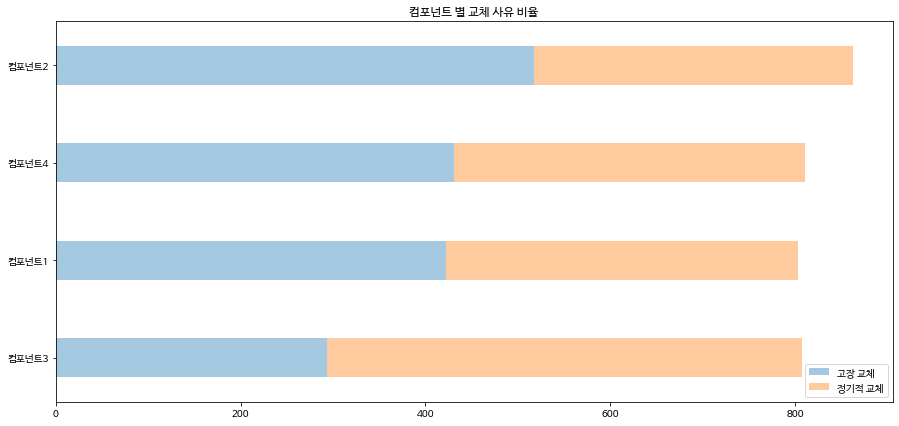

In [86]:
bar = data.plot.barh(stacked=True, figsize=(15,7), alpha = 0.4, width = 0.4)
plt.title('컴포넌트 별 교체 사유 비율')
plt.show()


In [98]:
mam =['컴포넌트3','컴포넌트4','컴포넌트1','컴포넌트2']

In [82]:
N = dataf.shape[0]
index = np.arange(N)
index

array([0, 1, 2, 3])

In [94]:
dataf = dataf.sort_values(by='고장에 의한 교체', ascending ='True')

In [97]:
dataf

,고장에 의한 교체,정기적 교체,총 평균
컴포넌트3,92.89,75.642,86.96
컴포넌트4,117.81,66.161,89.87
컴포넌트1,124.04,68.172,94.32
컴포넌트2,136.96,55.120,85.59


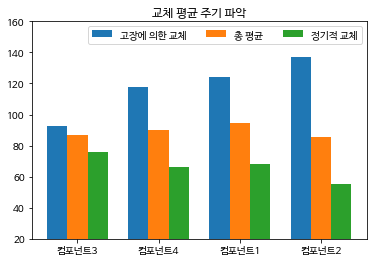

In [108]:
w = 0.25
plt.bar(index - w, dataf['고장에 의한 교체'],width = w, label='고장에 의한 교체')
plt.bar(index, dataf['총 평균'],width = w, label='총 평균')
plt.bar(index + w, dataf['정기적 교체'],width = w, label='정기적 교체')
plt.legend(ncol=3)
plt.xticks(index, mam)
plt.ylim(20,160)
plt.title('교체 평균 주기 파악')
plt.show()